# **Python tutoriál k distribúciám**

Na štvrtom cvičení ste mali možnosť zoznámiť sa s niekoľkými známymi rozdeleniami pravdepodobnosti a možnosťami ako ich popísať. Tento tutoriál slúži na to aby ste sa zoznámily ako pracovať s týmito reprezentáciami v pythone. Zejména sa budem venovať tomu ako o daných rozdeleniach získať základné informácie a vykresliť pre ne grafy. Nazačiatok klasické importy a pomocná funkcia, aby distribučná funkcia pre diskrétne rozdelenia vypadala normálne. Pre účely tutoriálu tieto časti kľudne preskočte a chodte priamo k rozdeleniam.

In [2]:
from scipy.stats import randint, bernoulli, geom, binom, poisson, uniform, expon, norm 
import numpy as np
from math import exp
import matplotlib.pyplot as plt
!pip install icecream
from icecream import ic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Helper function for for discrete distributions
def plotDiscreteCDF(xmin, xmax, distr, param, repeat = None):
  step = 0.5
  x = np.around(np.arange(xmin, xmax + step, step), 4)
  if repeat is None:
    distribution = lambda x: distr.cdf(x, param)
  else:
    distribution = lambda x: distr.cdf(x, repeat, param)
  y = distribution(x)
  xn = np.insert(x, len(x), xmax)
  fig, ax = plt.subplots()
  plt.title("Distribučná funkcia")
  ax.set_facecolor('white')
  ax.hlines(y=y, xmin=xn[0:-1], xmax=xn[1:], color='red', zorder=1)

  xnn = [xmin] + list(filter(lambda t: distribution(t) != distribution(t-step),x))
  ynn = distribution(xnn)
  ax.scatter(xnn[1:], ynn[1:], color='red', s=18, zorder=2)
  ax.scatter(xnn[1:], ynn[:-1], color='white', s=18, zorder=2, edgecolor='red')
  ax.grid(False)
  ax.set_xlim(x[0], x[-1])
  ax.set_ylim([-0.01, 1.03])

##  Diskrétne rozdelenia

Vo všetkých ukážkach sa budem držať jednotnej notácie. Teda:


*   **p** bude pravdepodobnosť úspechu
*   **n** počet pokusov
*   **lamb** bude očakávaný počet výskytov za jednotku času
*   **x** bude hodnota dosadzovaná do funkcíí

Ďalej predstavím notáciu pre rozdielne funkcie, ktoré scipy ponúka.

* **pmf** je pravdepodobnostná funkcia
* **cdf** je distribučná funkcia







ic| bernoulli.pmf(0,p): 0.7
ic| bernoulli.cdf(1,p): 1.0


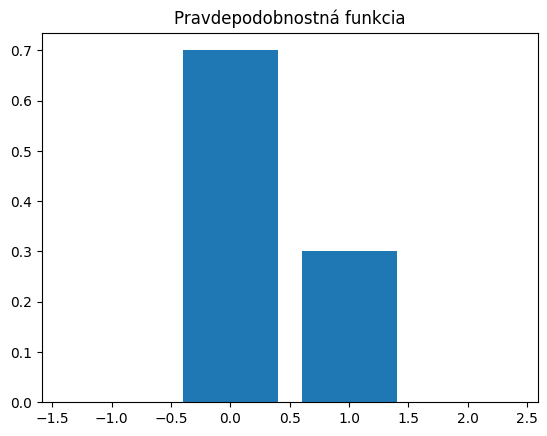

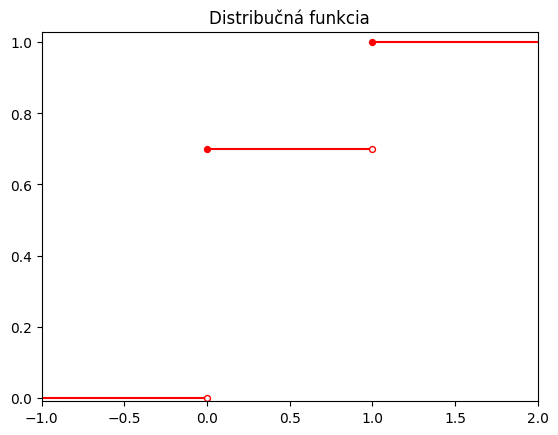

In [4]:
# Alternatívne
p = 0.3
ic(bernoulli.pmf(0,p))
ic(bernoulli.cdf(1,p))
x = np.around(np.arange(-1, 2.1, 1),2) # vytvoríte vektor hodnôt, funkcie nad ním operujú podobne ako map z haskellu
plt.bar(x, bernoulli.pmf(x, p))
plt.title("Pravdepodobnostná funkcia")
plotDiscreteCDF(x[0], x[-1], bernoulli, p)

ic| binom.pmf(x,n,p): 0.10291934519999989
ic| binom.cdf(x,n,p): 0.9526510126000001


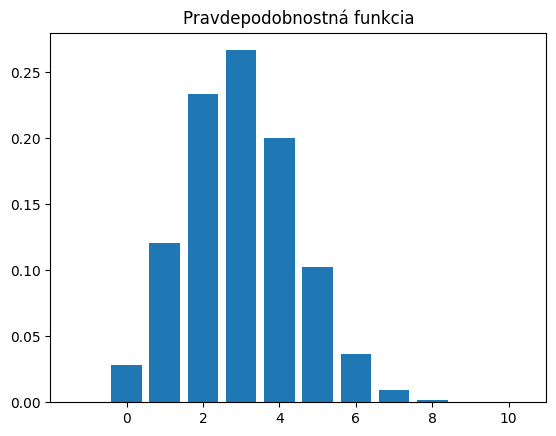

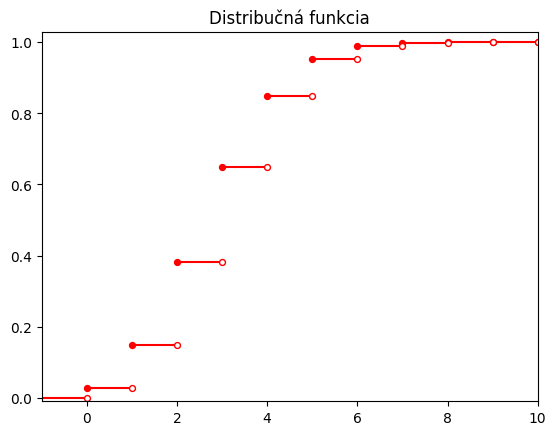

In [5]:
# Binomiálne
p = 0.3
n = 10
x = 5
ic(binom.pmf(x,n,p))
ic(binom.cdf(x,n,p))
x = np.around(np.arange(-1, 10.1, 1),2)
plt.bar(x, binom.pmf(x, n, p))
plt.title("Pravdepodobnostná funkcia")
plotDiscreteCDF(x[0], x[-1], binom, p, n)

ic| geom.pmf(x,p): 0.07202999999999998
ic| geom.cdf(x,p): 0.83193


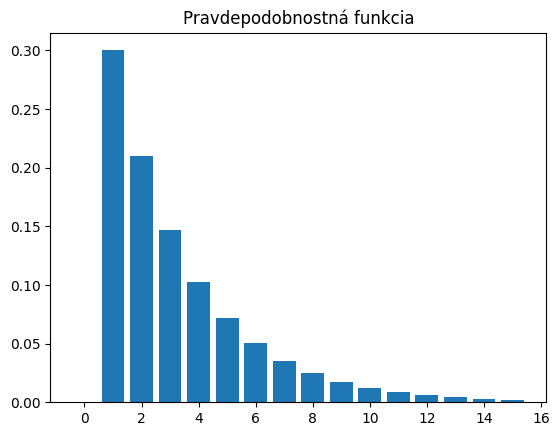

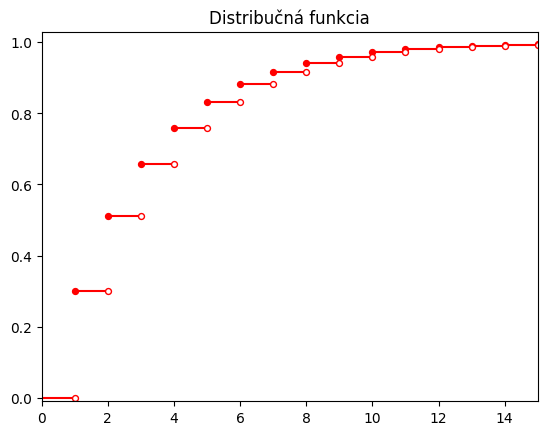

In [6]:
# Geometrické
p = 0.3
x = 5
ic(geom.pmf(x,p))
ic(geom.cdf(x,p))
x = np.around(np.arange(0, 15.1, 1),2)
plt.bar(x, geom.pmf(x, p))
plt.title("Pravdepodobnostná funkcia")
plotDiscreteCDF(x[0], x[-1], geom, p)

ic| poisson.pmf(5,lamb): 0.16062314104797995
ic| poisson.cdf(10,lamb): 0.957379076417462


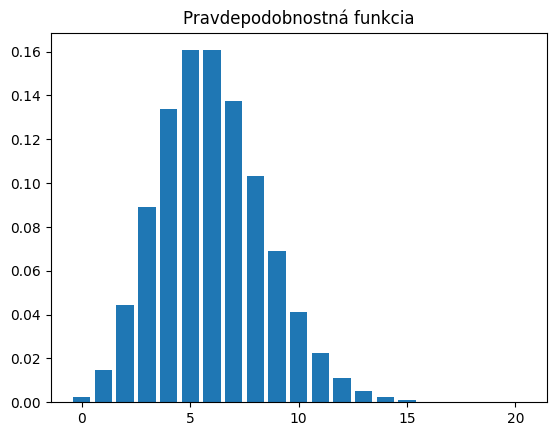

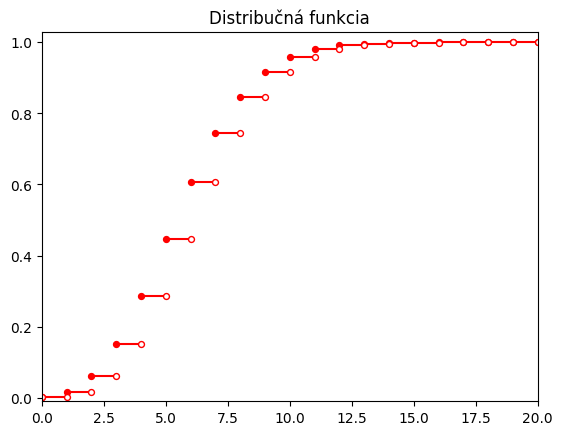

In [7]:
# Posissonovo
lamb = 6
ic(poisson.pmf(5,lamb))
ic(poisson.cdf(10,lamb))
x = np.around(np.arange(0, 20.1, 1),2)
plt.bar(x, poisson.pmf(x, lamb))
plt.title("Pravdepodobnostná funkcia")
plotDiscreteCDF(x[0], x[-1], poisson, lamb)

ic| randint.pmf(x,fromVal, toVal): 0.14285714285714285
ic| randint.cdf(x,fromVal, toVal): 0.5714285714285714


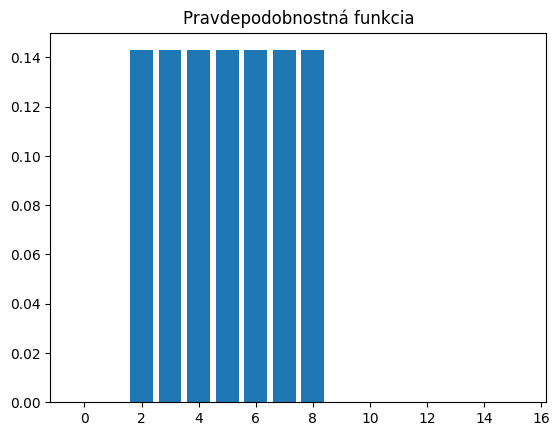

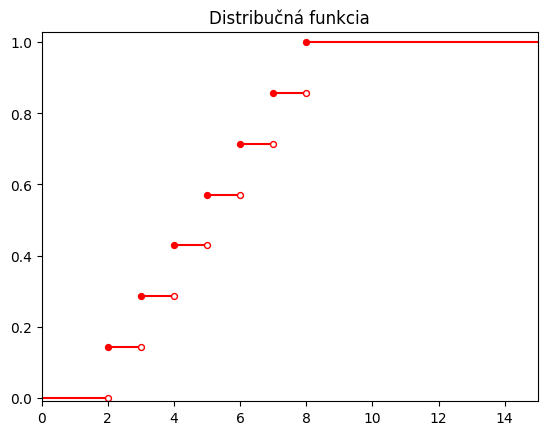

In [8]:
# Rovnomerné diskrétne
fromVal = 2
toVal = 9
x = 5
ic(randint.pmf(x,fromVal, toVal))
ic(randint.cdf(x,fromVal, toVal))
x = np.around(np.arange(0, 15.1, 1),2)
plt.bar(x, randint.pmf(x, fromVal, toVal))
plt.title("Pravdepodobnostná funkcia")
plotDiscreteCDF(x[0], x[-1], randint, toVal, fromVal)

## Spojité rozdelenia

Jediná zmena je, že nepoužívame pravdepodobnostú funkciu **pmf** ale hustotu pravdepodobnosti, teda funkciu **pdf**

ic| uniform.pdf(x,fromVal, toVal): 0.1
ic| uniform.cdf(x,fromVal, toVal): 0.5


Text(0.5, 1.0, 'Distribučná funkcia')

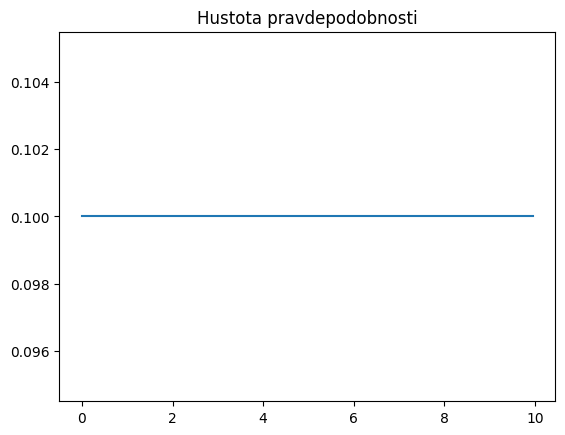

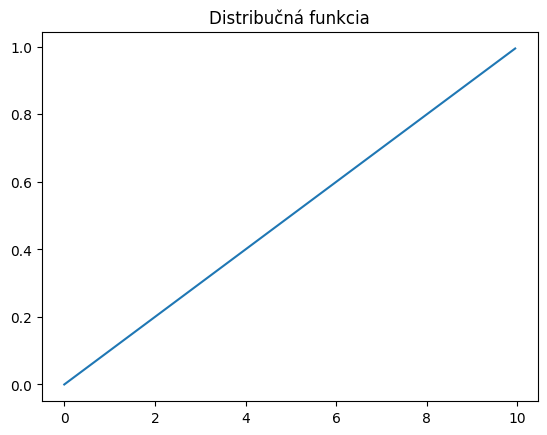

In [9]:
# Rovnomerné spojité
fromVal = 0
toVal = 10
x = 5
ic(uniform.pdf(x,fromVal, toVal))
ic(uniform.cdf(x,fromVal, toVal))
x = np.around(np.arange(0, 10, 0.05),3)
plt.figure(0)
plt.plot(x, uniform.pdf(x, fromVal, toVal))
plt.title("Hustota pravdepodobnosti")
plt.figure(1)
plt.plot(x, uniform.cdf(x, fromVal, toVal))
plt.title("Distribučná funkcia")

ic| expon.pdf(x, 0, 1/lamb): 0.014652511110987343
ic| expon.cdf(x, 0, 1/lamb): 0.9816843611112658


Text(0.5, 1.0, 'Distribučná funkcia')

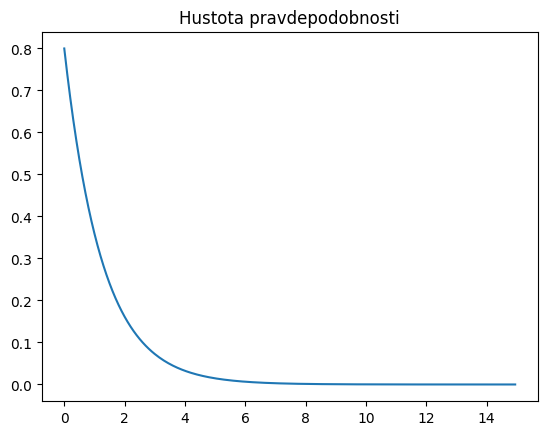

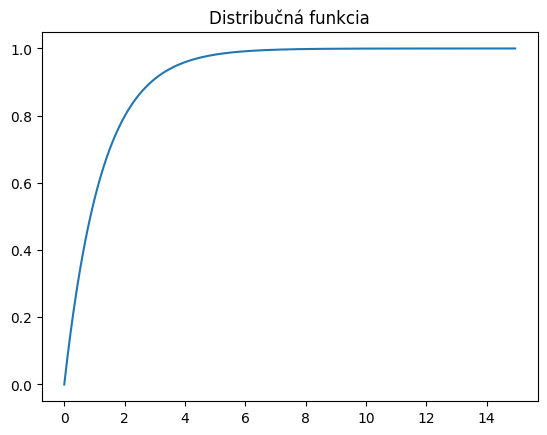

In [10]:
# Exponenciálne
lamb = 0.8
x = 5
ic(expon.pdf(x, 0, 1/lamb))
ic(expon.cdf(x, 0, 1/lamb))
x = np.around(np.arange(0, 15, 0.05),3)
plt.figure(0)
plt.plot(x, expon.pdf(x, 0, 1/lamb))
plt.title("Hustota pravdepodobnosti")
plt.figure(1)
plt.plot(x, expon.cdf(x, 0, 1/lamb))
plt.title("Distribučná funkcia")

ic| norm.pdf(x, Expectation, Variance): 0.07978845608028654
ic| norm.cdf(x, Expectation, Variance): 0.5


Text(0.5, 1.0, 'Distribučná funkcia')

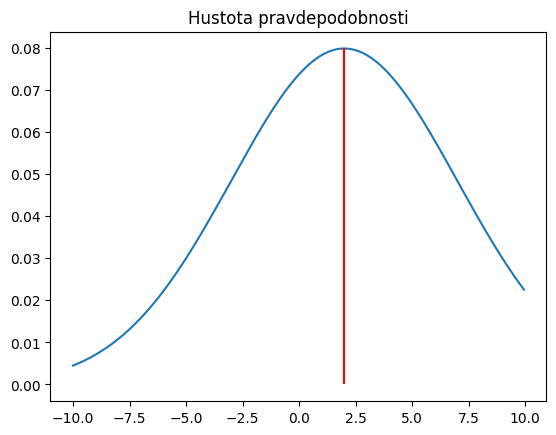

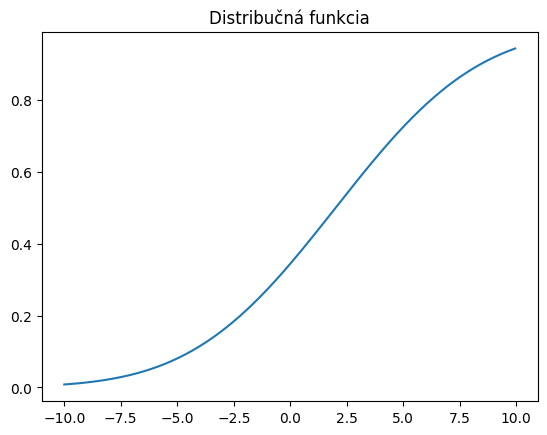

In [11]:
# Normálne
Expectation = 2
Variance = 5
x = 2
ic(norm.pdf(x, Expectation, Variance))
ic(norm.cdf(x, Expectation, Variance))
x = np.around(np.arange(-10, 10, 0.05),3)
plt.figure(0)
plt.plot(x, norm.pdf(x, Expectation, Variance))
plt.title("Hustota pravdepodobnosti")
plt.vlines(Expectation, [0], [norm.pdf(Expectation, Expectation, Variance)], color= "red") # naznačenie kde je peak
plt.figure(1)
plt.plot(x, norm.cdf(x, Expectation, Variance))
plt.title("Distribučná funkcia")

In [20]:
from scipy.stats import randint, bernoulli, geom, binom, poisson, uniform, expon, norm 
import numpy as np
from math import exp, sqrt
import matplotlib.pyplot as plt
import pandas as pd
import itertools
!pip install icecream
from icecream import ic

# Ad, rozdelenie pre testovanie hypotéz
data = pd.read_csv(r"data_odpovednik5.csv", sep = ';') # pre zistenie adresy kliknite prvym na subor a dajte copy path
data.head() # príkaz, ktorý vám ukáže prvých pár riadkov vašeho datasetu
entries = len(data) # pocet riadkov vasej tabulky
n = len(data["skore.matematika"]) # pocet pozorovani
print(n)
# # podme postupne konstruovat tabulku cetnosti
# data["relativni cetnosti"] = data["skore.telocvik"] / n
# data["kumulativni cetnosti"] = data["skore.telocvik"].cumsum()
# data["ECDF"] = data["kumulativni cetnosti"] / n # relativne kumulativne cetnosti
# kedže máme tabuľku kde máme četnosti dát, tak si vytvoríme vektor dát nad ktorým sa bude krajšie pracovať])
X = list(data['skore.matematika'])
# ic(X) # vpodstate sme si nakopirovali cetnost(times) krát znamky (to repeat) 
priemer =  np.mean(X) #priemer 

rozptyl = np.var(X)
# print(rozptyl)
vyberovy_rozptyl = rozptyl * n / (n-1)
print(vyberovy_rozptyl)
# smerodatna_odch = np.std(X)
# median = np.quantile(X, 0.5, method = 'inverted_cdf')
# q_025 = np.quantile(X, 0.25, method = 'inverted_cdf')
# q_075 = np.quantile(X, 0.75, method = 'inverted_cdf')
# IQR = q_075 - q_025 # kvartilova odchylka
# # nakoniec hradby boxplotu
# dvnh = q_025 - 1.5 * IQR # dolni vnitrni hradba
# hvnh = q_075 + 1.5 * IQR# horni vnitrni hradba
# dvoh = q_025 - 3 * IQR# dolni vonkajsi hradba
# hvoh = q_075 + 3 * IQR# horni vonkajsi hradba
# ic(entries, n, priemer, rozptyl, vyberovy_rozptyl, smerodatna_odch, median, q_025, q_075, IQR, dvnh, hvnh, dvoh, hvoh)
# data # tabulka cetnosti

a = vyberovy_rozptyl * priemer / sqrt(n)
print(a)
# # normálne
confidence = 0.025
confidence2 = 0.975
# alpha5 = norm.ppf(confidence, loc=0, scale=1)
# confidence = 0.95
# alpha95 = norm.ppf(confidence, loc=0, scale=1)
# ic(alpha5, alpha95)

# # # ine rozdelenia
from scipy.stats import ncx2,nct, ncf
# # chi kvadrat
# degreesOfFreedom = 199
# print(ncx2.ppf(confidence, degreesOfFreedom, 0, loc=0, scale=1))
degreesOfFreedom = 199
# print(ncx2.ppf(confidence2, degreesOfFreedom, 0, loc=0, scale=1))
# # studentovo
print(nct.ppf(confidence, degreesOfFreedom, 0, loc=0, scale=1))
print(nct.ppf(confidence2, degreesOfFreedom, 0, loc=0, scale=1))
# # F rozdelenie
# degreesOfFreedom2 = 10
# ncf.ppf(confidence, degreesOfFreedom, degreesOfFreedom2, 0, loc=0, scale=1)




Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


ic| X: [99.4,
        71.7,
        78.7,
        104.2,
        102.3,
        98.9,
        76.1,
        83.9,
        98.1,
        94.4,
        88.0,
        92.2,
        91.3,
        121.5,
        

200


119.3,
        90.8,
        89.3,
        97.0,
        100.8,
        86.2,
        77.5,
        88.7,
        76.1,
        100.5,
        114.9,
        92.4,
        115.8,
        88.8,
        94.8,
        81.1,
        88.4,
        91.8,
        95.2,
        105.5,
        105.4,
        77.4,
        128.7,
        122.5,
        95.0,
        95.6,
        119.2,
        99.0,
        115.8,
        116.2,
        100.8,
        96.5,
        119.0,
        108.4,
        89.7,
        70.5,
        108.8,
        91.9,
        110.6,
        129.2,
        98.4,
        100.8,
        93.2,
        105.3,
        109.1,
        89.9,
        72.7,
        104.2,
        109.5,
        110.4,
        95.9,
        112.4,
        95.7,
        132.2,
        86.2,
        64.8,
        98.3,
        102.2,
        127.3,
        79.9,
        105.6,
        108.3,
        107.8,
        123.8,
        88.7,
        91.2,
        112.3,
        72.5,
        86.7,
        1

265.9696190954774
235.23535200000003
161.82618239364686
239.9596818276442
